<a href="https://colab.research.google.com/github/CodeDataScienceTunis/Fraud-Detection-using-Decision-Tree-Classifier/blob/main/Script_1_Fraud_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import pandas and read csv 

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
path = '/content/drive/MyDrive/datasets/creditcard_data.csv'
df = pd.read_csv (path)
df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,64,1.212511,-0.099054,-1.192094,0.286324,2.160516,3.616314,-0.404207,0.842331,0.169360,-0.030522,-0.541957,0.237212,-0.218130,0.197437,-0.147850,-0.097830,-0.510053,-0.070939,0.355171,0.014777,-0.167496,-0.494695,-0.149785,1.011227,0.883548,-0.329434,0.020370,0.017037,34.70,0
1,1,64,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,0.025133,-0.778135,-0.196290,0.632955,0.374025,-0.531597,-0.615063,-0.518078,0.003881,-1.288954,-0.797804,0.064133,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0
2,2,124,1.105253,0.541842,0.839421,2.570933,-0.279517,-0.423062,0.088019,0.011622,-0.715756,0.651379,0.073787,-0.142024,-0.739457,0.502639,0.736688,0.256745,-0.093732,-1.011416,-1.465500,-0.239883,-0.137434,-0.460991,0.189397,0.556329,0.185786,-0.189030,0.000208,0.026167,6.24,0
3,3,128,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,0.984938,-0.746625,1.563459,0.890132,-0.985159,0.778734,1.016974,-0.429490,-0.335787,0.614690,0.703133,-0.160406,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,8.80,0
4,4,132,-1.571359,1.687508,0.734670,1.293350,-0.217532,-0.002677,0.147364,0.515362,-0.372442,0.078021,-0.592495,0.997941,1.109328,0.060048,0.086141,-1.149893,0.765198,-0.810589,0.737550,-0.093614,0.048549,0.377256,-0.030436,0.117608,-0.060520,-0.296550,-0.481570,-0.167897,10.00,0


# Explore the features available in your dataframe

In [147]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8000 non-null   int64  
 1   Time        8000 non-null   int64  
 2   V1          8000 non-null   float64
 3   V2          8000 non-null   float64
 4   V3          8000 non-null   float64
 5   V4          8000 non-null   float64
 6   V5          8000 non-null   float64
 7   V6          8000 non-null   float64
 8   V7          8000 non-null   float64
 9   V8          8000 non-null   float64
 10  V9          8000 non-null   float64
 11  V10         8000 non-null   float64
 12  V11         8000 non-null   float64
 13  V12         8000 non-null   float64
 14  V13         8000 non-null   float64
 15  V14         8000 non-null   float64
 16  V15         8000 non-null   float64
 17  V16         8000 non-null   float64
 18  V17         8000 non-null   float64
 19  V18         8000 non-null  

# Count the occurrences of fraud and no fraud and print them

In [148]:
occ = df['Class'].value_counts()
print(occ)

0    7983
1      17
Name: Class, dtype: int64


# Print the ratio of fraud cases

In [149]:
print(occ / len(df.index))

0    0.997875
1    0.002125
Name: Class, dtype: float64


# Plotting your data

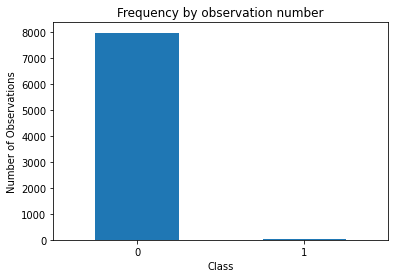

In [150]:
plt.xlabel("Class")
plt.ylabel("Number of Observations")
occ.plot(kind = 'bar',title = 'Frequency by observation number',rot=0)

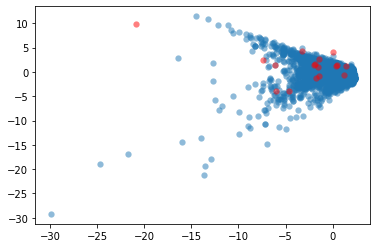

In [151]:
# Plot how fraud and non-fraud cases are scattered 
plt.scatter(df.loc[df['Class'] == 0]['V1'], df.loc[df['Class'] == 0]['V2'], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(df.loc[df['Class'] == 1]['V1'], df.loc[df['Class'] == 1]['V2'], label="Class #1", alpha=0.5, linewidth=0.15,c='r')
plt.show()

In [152]:
# Define the prep_data function to extrac features 
def prep_data(df):
    X = df.drop(['Class'],axis=1, inplace=False) #  
    X = np.array(X).astype(np.float)
    y = df[['Class']]  
    y = np.array(y).astype(np.float)
    return X,y

# Create X and y from the prep_data function 
X, y = prep_data(df)

In [153]:
# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Decision Tree Classifier

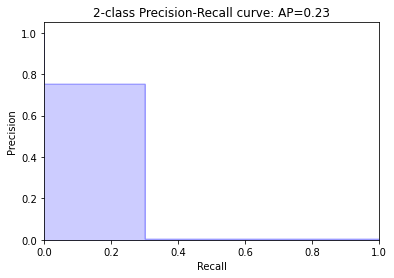

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2390
         1.0       0.75      0.30      0.43        10

    accuracy                           1.00      2400
   macro avg       0.87      0.65      0.71      2400
weighted avg       1.00      1.00      1.00      2400

Confusion matrix:
 [[2389    1]
 [   7    3]]


In [154]:
# Import the decision tree model from sklearn
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Fit a logistic regression model to our data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Obtain model predictions
y_predicted = model.predict(X_test)

# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, y_predicted)

# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))